### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [5]:
data = pd.read_csv(r"C:\Users\hp\Documents\Pima_Diabetes\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploring the Dataset

In [8]:
data.shape

(768, 9)

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
#checking for the summary statistics
data.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768,3,3,0,1,3,6,17
Glucose,768,120,31,0,99,117,140,199
BloodPressure,768,69,19,0,62,72,80,122
SkinThickness,768,20,15,0,0,23,32,99
Insulin,768,79,115,0,0,30,127,846
BMI,768,31,7,0,27,32,36,67
DiabetesPedigreeFunction,768,0,0,0,0,0,0,2
Age,768,33,11,21,24,29,41,81
Outcome,768,0,0,0,0,0,1,1


In [18]:
#checking for Null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# checking for NaN values
data_copy = data.copy(deep = True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Data Visualization

In [29]:
#lets fill the NaN values with their mean and median
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)


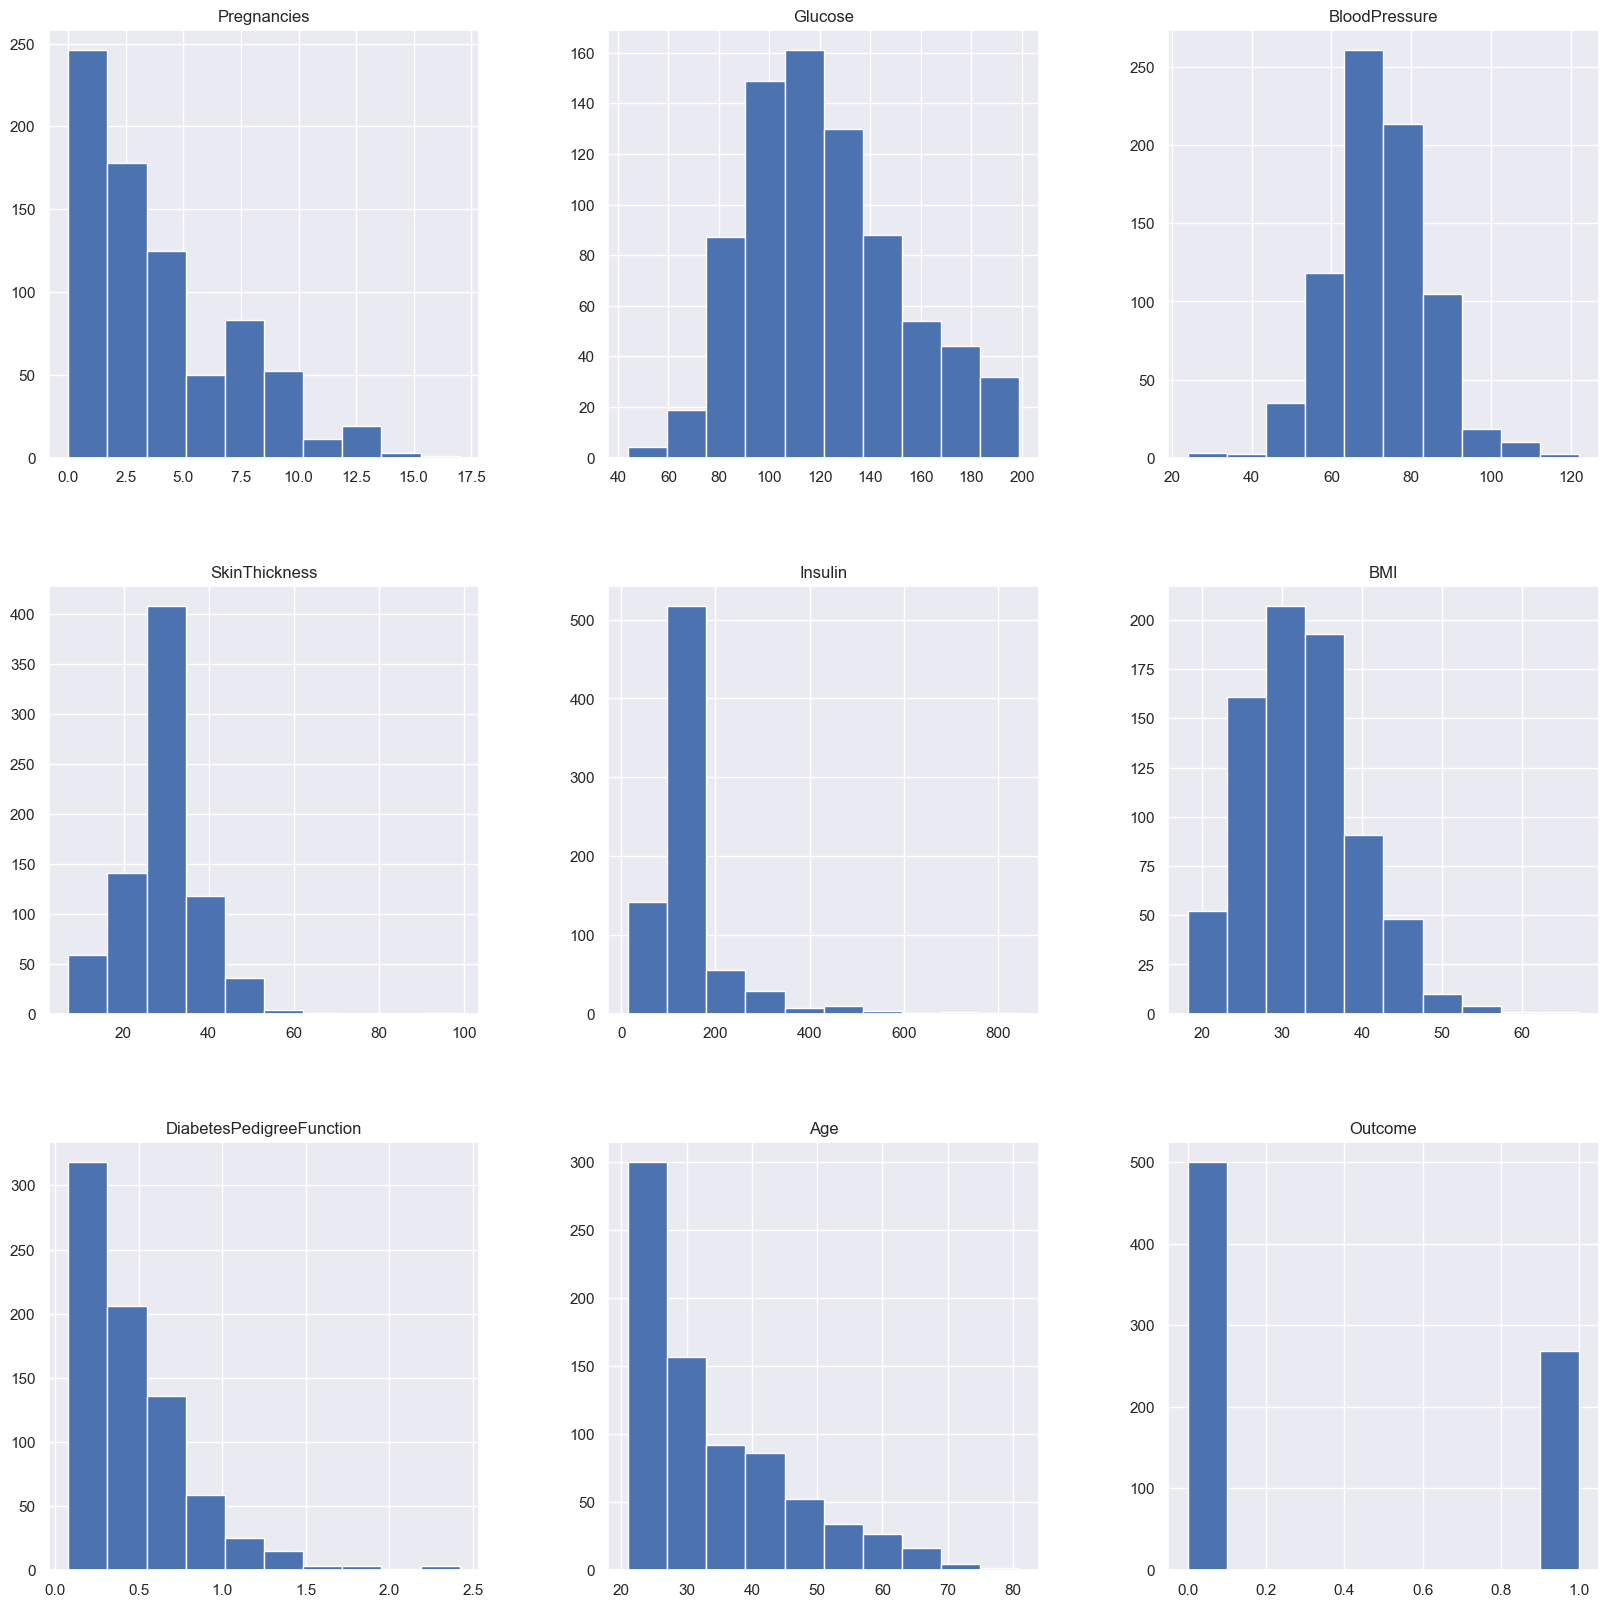

In [33]:
#Plotting the histogram after removing NaN Values
p = data_copy.hist(figsize = (20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


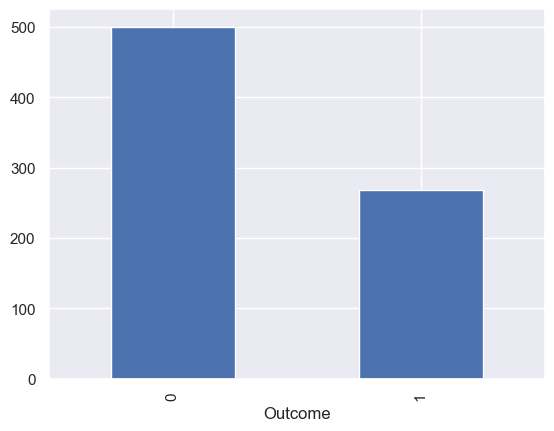

In [35]:
# plotting the count of the outcome
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

The above chart shows that the dataset is biased towards datapoints having outcome values as 0 where it means that diabetes was not present actually. the number of non-diabetes is almost twice the number of duabetes patients.

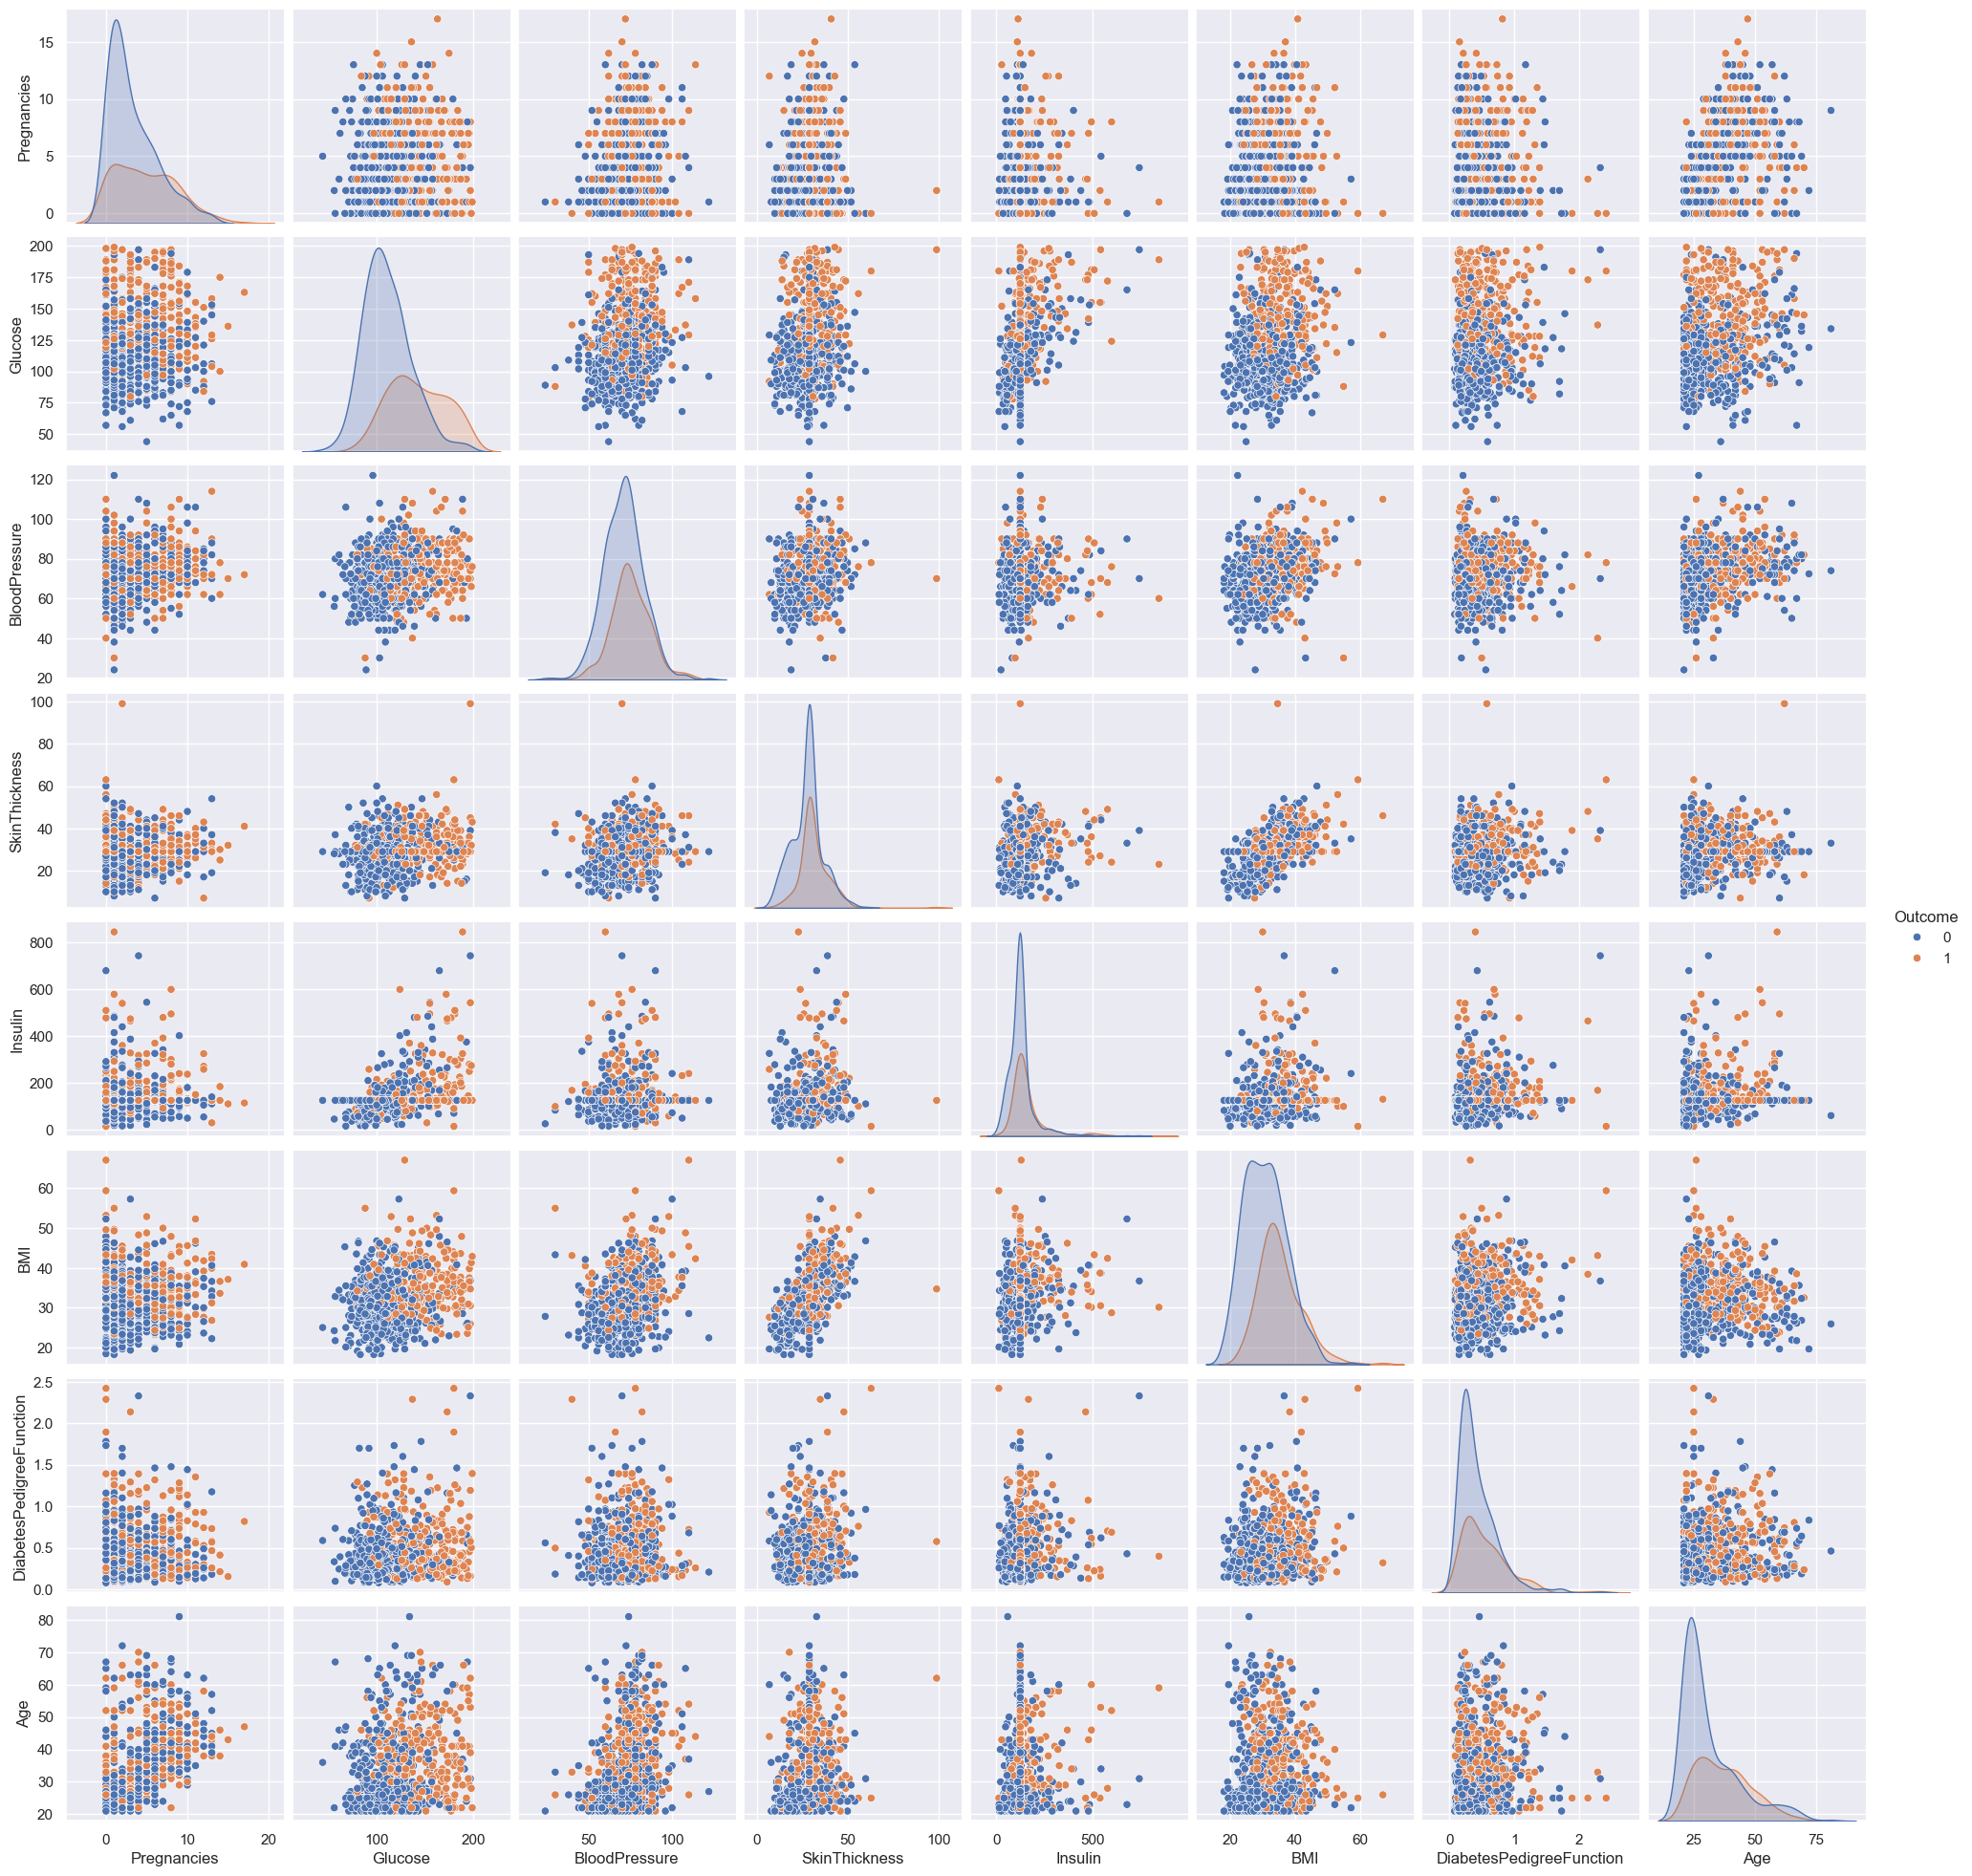

In [42]:
p=sns.pairplot(data_copy, hue ="Outcome")

### Correlation between all features

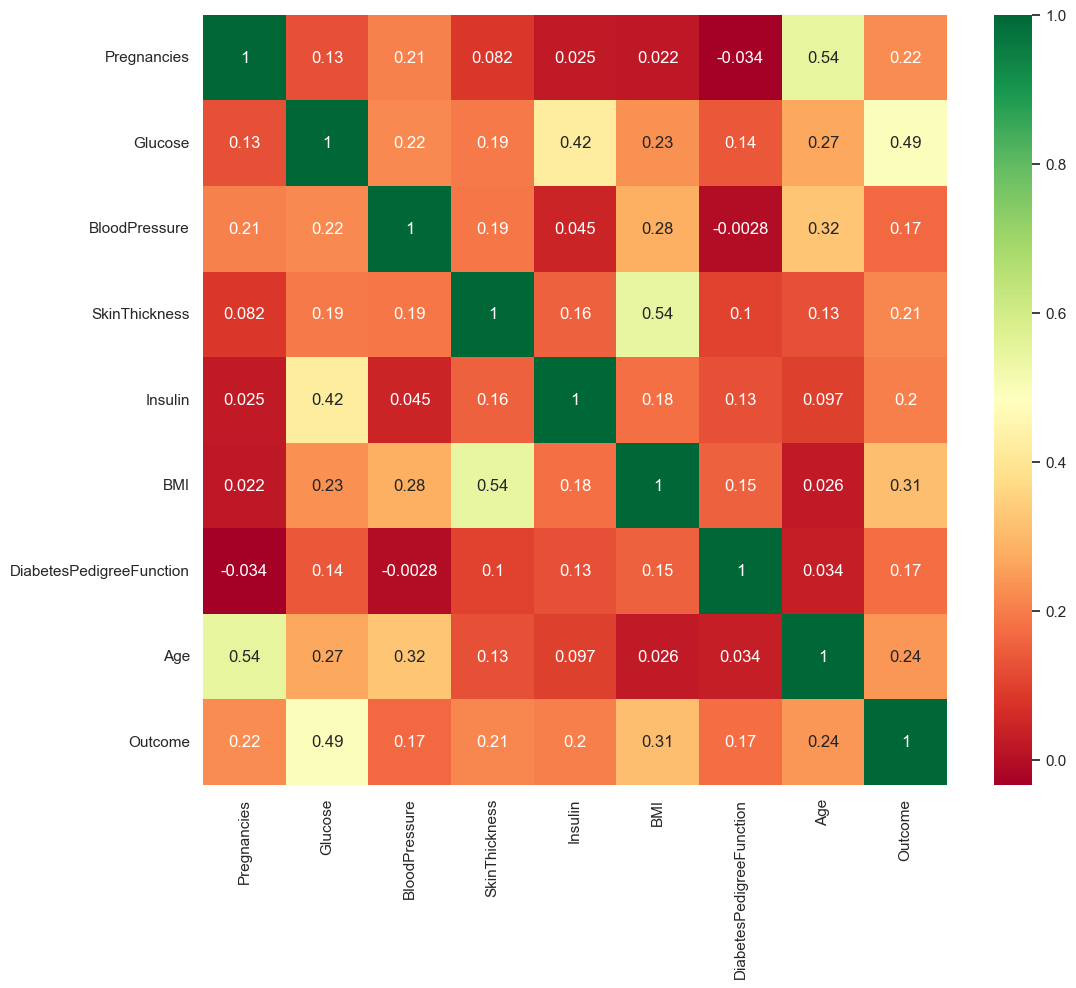

In [45]:
plt.figure(figsize=(12, 10))
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')

### Scaling the Data

In [50]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [81]:
y = data_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### SMOTE Technique to balance the dataset

In [84]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# To print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y_train)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 333, 1: 179})
Class distribution after resampling: Counter({0: 333, 1: 333})


### Splitting the Data into Train and Test

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

### Model Building

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Instantiate the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the logistic regression model on the training data
logreg_model.fit(X_train, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'binary' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Make predictions using the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the logistic regression is {accuracy} %')

# Display the results
logreg_result


The accuracy of the logistic regression is 73.046875 %


{'Model': 'Logistic Regression',
 'Accuracy': 0.73046875,
 'Precision': 0.7021829521829521,
 'Recall': 0.6832066204669313,
 'F1 Score': 0.6894896900873662,
 'Confusion Matrix': array([[140,  27],
        [ 42,  47]], dtype=int64)}

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the training data
dt_model.fit(X_train, y_train)

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
}
    return results

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Decision Tree is {accuracy} %')

# Example usage
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

The accuracy of the Decision Tree is 73.046875 %


{'Model': 'dt_model',
 'Accuracy': 0.73046875,
 'Precision': 0.6351351351351351,
 'Recall': 0.5280898876404494,
 'F1-Score': 0.5766871165644172}

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the SVM model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the SVM model on the training data
rf_model.fit(X_train, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = rf_model.predict(X_test)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Random Forest Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')

# Step 6: Display the results
rf_result


The accuracy of the Random Forest Model is 74.21875 %


{'Model': 'rf_model',
 'Accuracy': 0.7421875,
 'Precision': 0.7154401773582206,
 'Recall': 0.7026845186032429,
 'F1-Score': 0.707641196013289}

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Instantiate the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 2: Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = svm_model.predict(X_test)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the SVM model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
svm_result = metrics_calculator(y_test, y_pred, 'SVM')

# Step 6: Display the results
svm_result


The accuracy of the SVM model is 73.4375 %


{'Model': 'SVM',
 'Accuracy': 0.734375,
 'Precision': 0.7084398976982097,
 'Recall': 0.6809527013388952,
 'F1-Score': 0.6887649288421656}

In [105]:
# Import the necessary library
from xgboost import XGBClassifier

# Step 1: Instantiate the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 2: Train the XGBoost model on the training set (using Standard Scaled Data)
xgb_model.fit(X_train, y_train)

# Step 3: Predict on the validation set
y_pred_xgb = xgb_model.predict(X_test)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Predict on the validation set
y_pred = xgb_model.predict(X_test)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the XGBoost Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
xgb_result = metrics_calculator(y_test, y_pred, 'XGBoost Model')

# Step 6: Display the results
xgb_result


The accuracy of the XGBoost Model is 73.4375 %


{'Model': 'XGBoost Model',
 'Accuracy': 0.734375,
 'Precision': 0.7063165958632217,
 'Recall': 0.699320460203189,
 'F1-Score': 0.7023255813953488}

# Model Performance Summary

## Overview of Metrics

| Model                | Accuracy (%) | Precision      | Recall         | F1 Score       |
|----------------------|--------------|----------------|----------------|----------------|
| **Logistic Regression** | 73.05        | 70.22          | 68.32          | 68.95          |
| **XGBoost Model**      | 73.44        | 70.63          | 69.93          | 70.23          |
| **SVM**                | 73.44        | 70.84          | 68.10          | 68.88          |
| **Random Forest Model**| 74.22        | 71.54          | 70.27          | 70.76          |
| **Decision Tree**      | 73.05        | 63.51          | 52.81          | 57.67          |

## Analysis

1. **Accuracy**:
   - The **Random Forest Model** has the highest accuracy at **74.22%**.
   - Both **XGBoost** and **SVM** follow closely with **73.44%**.

2. **Precision**:
   - The **Random Forest Model** leads in precision with **71.54%**.
   - The **Decision Tree** has the lowest precision at **63.51%**.

3. **Recall**:
   - The **Random Forest Model** shows the best recall at **70.27%**.
   - The **Decision Tree** performs poorly in recall, achieving only **52.81%**.

4. **F1 Score**:
   - The **Random Forest Model** has the highest F1 score of **70.76%**.
   - The **Decision Tree** has the lowest F1 score at **57.67%**, indicating it struggles to balance precision and recall effectively.

## Conclusion

- The **Random Forest Model** outperforms the other models across all metrics, making it the most reliable choice based on this evaluation.
- The **Decision Tree** model shows significant weaknesses, particularly in recall and F1 score, indicating it may not be suitable for tasks where false negatives are critical.
- **XGBoost** and **SVM** provide competitive accuracy but do not surpass the Random Forest in precision, recall, or F1 score.
